# Summary plot
17th April 2024

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# increase the font size
plt.rcParams.update({'font.size': 10})
plt.rcParams['hatch.color'] = 'bisque'

In [14]:
x = np.linspace(0, 4, 4)
models = ['SLM', 'CM', 'S-WBM', 'NS-WBM']
hatch = [None, None, None, '/']
colors = ['lightgrey', 'dodgerblue', 'orange', 'orange']
r2 = [0.52, 0.81, 0.78, 0.64 ]
rmse = [0.88, 0.58, 0.88, 1.13]
mll = [1.31, 2.96, 2.91, 1.40]

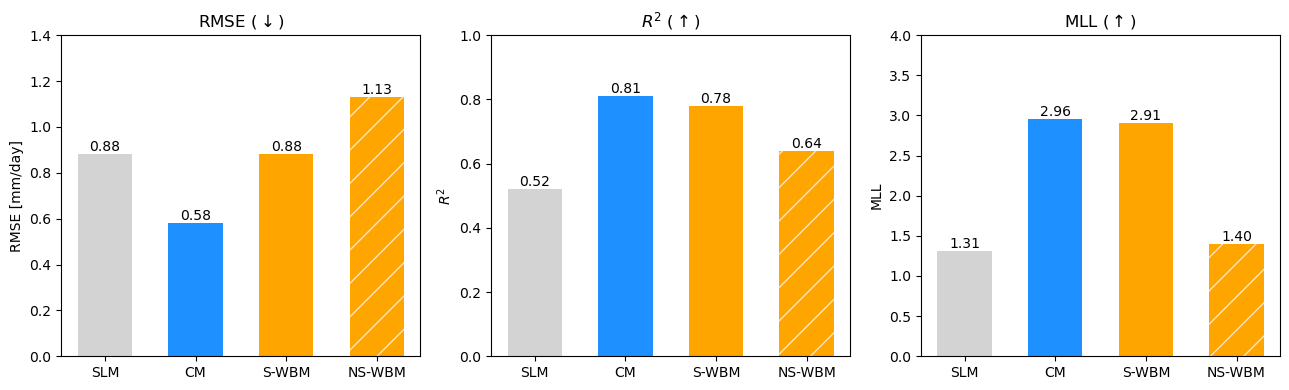

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(13, 4))


b1 = ax[0].bar(x, rmse, color=colors, hatch=hatch)
ax[0].set_title(r'RMSE ($\downarrow$)')
ax[0].set_ylabel('RMSE [mm/day]')
ax[0].bar_label(b1, fmt='%.2f')
ax[0].set_ylim(0, 1.4)
ax[0].set_xticks(x)
ax[0].set_xticklabels(models)

b0 = ax[1].bar(x, r2, color=colors, hatch=hatch)
ax[1].set_title(r'$R^2$ ($\uparrow$)')
ax[1].set_ylabel(r'$R^2$')
ax[1].bar_label(b0, fmt='%.2f')
ax[1].set_ylim(0, 1)
ax[1].set_xticks(x)
ax[1].set_xticklabels(models)

b2 = ax[2].bar(x, mll, color=colors, hatch=hatch)
ax[2].set_title(r'MLL ($\uparrow$)')
ax[2].set_ylabel('MLL')
ax[2].bar_label(b2, fmt='%.2f')
ax[2].set_ylim(0, 4)
ax[2].set_xticks(x)
ax[2].set_xticklabels(models)

fig.tight_layout()
plt.savefig('summaryplot.pdf')
plt.show()

In [18]:
# Data Preparation

import sys
import numpy as np
import scipy as sp
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# custom libraries
sys.path.append('/Users/kenzatazi/Documents/CDT/Code/')  # noqa
sys.path.append('/Users/kenzatazi/Documents/CDT/Code/precip-prediction')  # noqa
from load import era5, location_sel
import gp.sampling as sa

In [19]:
seed = 42
length = 1000

In [22]:
uib_ds = era5.collect_ERA5('uib', minyear="2005", maxyear="2020")
df_clean = uib_ds.to_dataframe().dropna()
df = sa.random_location_and_time_sampler(df_clean, length=length, seed=seed)
df_eval = df[["slor", "anor", "z", "d2m", "tcwv", "N34", "tp"]]

indus
/Users/kenzatazi/Documents/CDT/Code/data/ERA5/combi_data_indus_2024-04.csv


In [70]:
xtest_uib_df

,,,slor,anor,z,d2m,tcwv,N34
time,lon,lat,,,,,,
2009-01-01,76.50,36.00,0.087713,-0.067334,5069.6480,246.40129,1.271053,25.66
2013-10-01,73.75,35.50,0.087896,0.997297,2619.1733,272.15707,8.006826,26.52
2007-10-01,77.75,34.50,0.119076,0.707823,4898.9010,256.76855,2.139469,25.32
2010-01-01,79.75,32.25,0.069493,0.548069,4873.3438,247.95921,1.152531,28.07
2008-10-01,77.75,32.75,0.044741,0.633259,5170.4507,255.00210,1.601139,26.37
...,...,...,...,...,...,...,...,...
2009-08-01,79.00,33.75,0.074912,1.079464,4960.0600,266.16074,5.915535,27.42
2015-09-01,72.75,35.75,0.075613,0.008741,4149.6587,270.99634,5.648584,28.93
2008-03-01,80.75,34.00,0.041783,0.626978,5052.9673,250.16551,1.266621,26.07


In [94]:
y_df = df_eval["tp"]
x_df = df_eval.drop(columns=["tp"])
xval_uib_df, xtest_uib_df, yval_uib_df, ytest_uib_df = train_test_split(x_df, y_df, test_size=1./3., shuffle=True, random_state=seed)

In [96]:
xval_uib_df = xval_uib_df[~xval_uib_df.index.duplicated()]
xtest_uib_df = xtest_uib_df[~xtest_uib_df.index.duplicated()]
yval_uib_df = yval_uib_df[~yval_uib_df.index.duplicated()]
ytest_uib_df = ytest_uib_df[~ytest_uib_df.index.duplicated()]

In [97]:
xtest_uib_df = xtest_uib_df.reset_index()

In [123]:
xtest_uib_df 

,time,lon,lat,slor,anor,z,d2m,tcwv,N34
0,2009-01-01,76.50,36.00,0.087713,-0.067334,5069.6480,246.40129,1.271053,25.66
1,2013-10-01,73.75,35.50,0.087896,0.997297,2619.1733,272.15707,8.006826,26.52
2,2007-10-01,77.75,34.50,0.119076,0.707823,4898.9010,256.76855,2.139469,25.32
3,2010-01-01,79.75,32.25,0.069493,0.548069,4873.3438,247.95921,1.152531,28.07
4,2008-10-01,77.75,32.75,0.044741,0.633259,5170.4507,255.00210,1.601139,26.37
...,...,...,...,...,...,...,...,...,...
328,2009-08-01,79.00,33.75,0.074912,1.079464,4960.0600,266.16074,5.915535,27.42
329,2015-09-01,72.75,35.75,0.075613,0.008741,4149.6587,270.99634,5.648584,28.93
330,2008-03-01,80.75,34.00,0.041783,0.626978,5052.9673,250.16551,1.266621,26.07
331,2005-10-01,78.50,34.00,0.093932,0.144364,5131.6180,254.10747,1.641014,26.65


In [131]:
location = np.array([76.50, 36.00])

In [132]:
xtest_df = xtest_uib_df[(xtest_uib_df['lat']== location[1]) & (xtest_uib_df['lon'] == location[0])]

In [133]:
xtest_df

,time,lon,lat,slor,anor,z,d2m,tcwv,N34
0,2009-01-01,76.5,36.0,0.087713,-0.067334,5069.648,246.40129,1.271053,25.66
269,2017-07-01,76.5,36.0,0.087713,-0.067334,5069.648,271.40344,7.095209,27.54


In [126]:


yval_df = yval_uib_df.loc(yval_uib_df['lat'] == location[0] & yval_uib_df['lon'] == location[1])
ytest_df = ytest_uib_df.loc(ytest_uib_df['lat'] == location[0] & ytest_uib_df['lon'] == location[1])

KeyError: 'lat'